In [1]:
!pip install lightgbm

In [2]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
import xgboost as xgb
from imblearn.over_sampling import SMOTE

In [4]:
df=pd.concat([pd.read_csv('Titanic_train.csv'),pd.read_csv('Titanic_test.csv')])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


# Exploratory Data Analysis (EDA)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [8]:
df.duplicated().sum()

0

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
df.dtypes

,0
PassengerId,int64
Survived,float64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


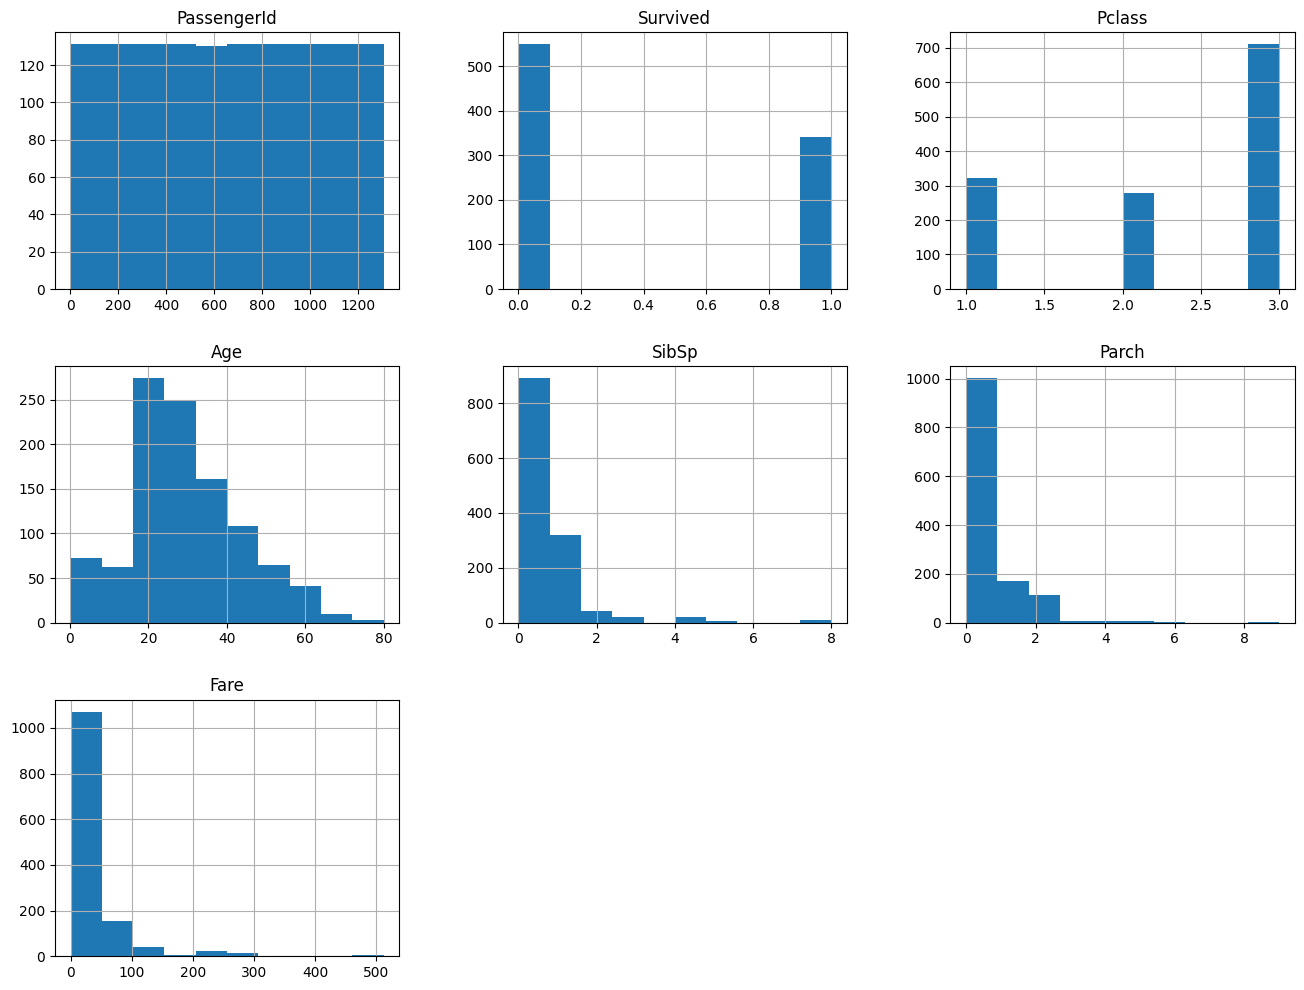

In [11]:
df.hist(figsize=(16,12))
plt.show()

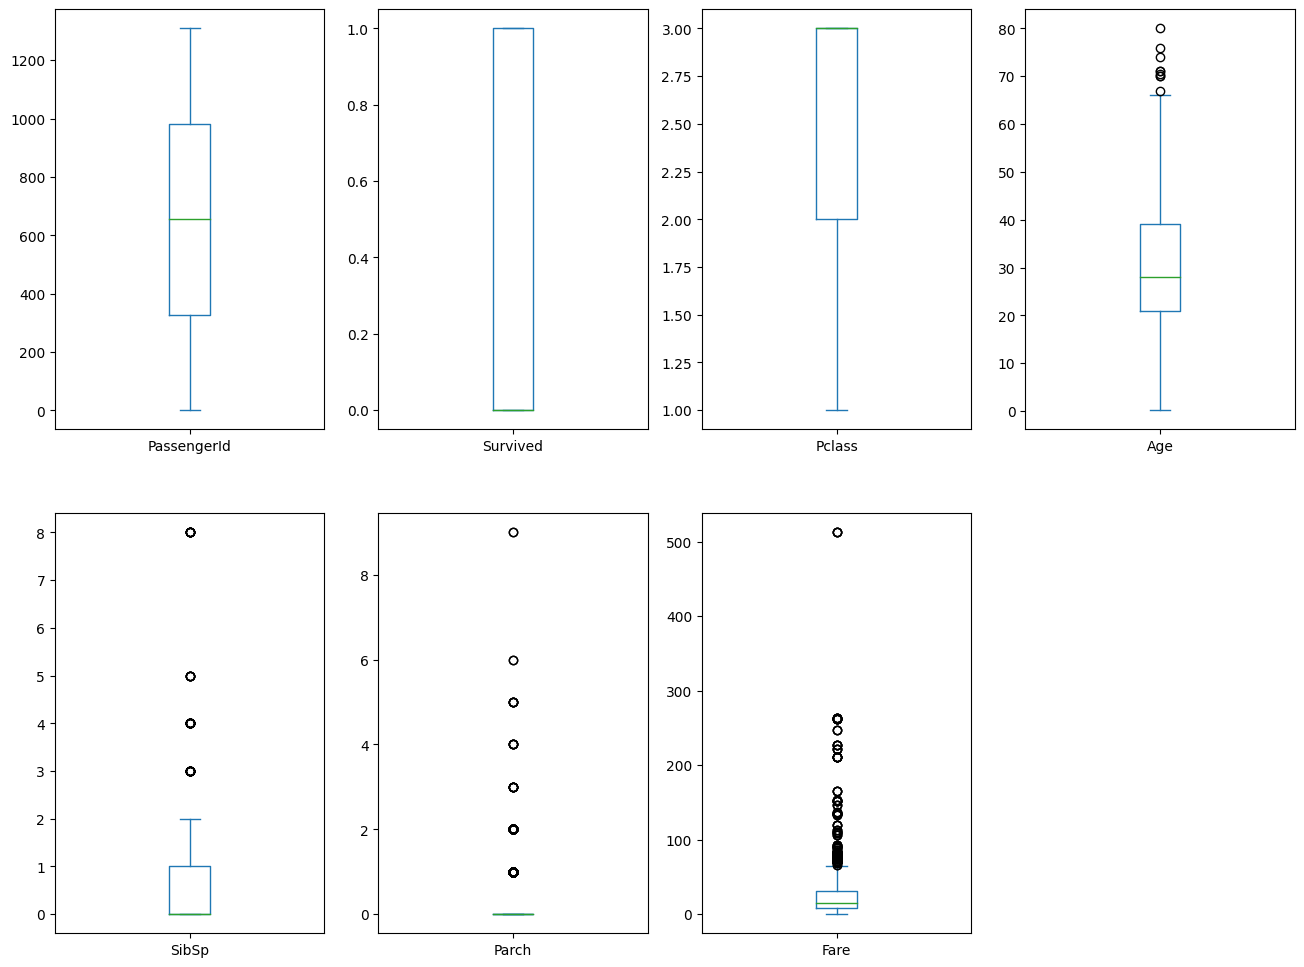

In [12]:
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(16,12))
plt.show()

In [13]:
df=df.drop_duplicates()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


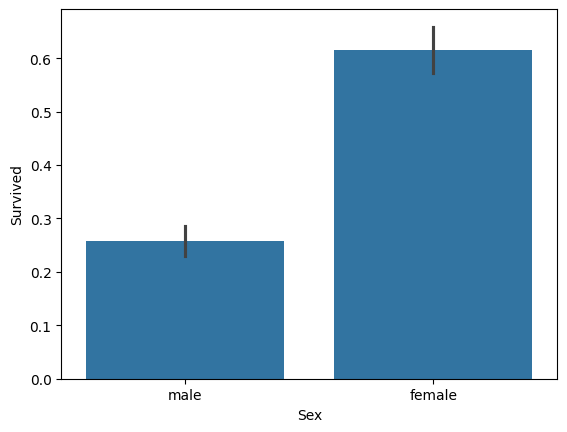

In [14]:
sns.barplot(x='Sex',y='Survived',data=df)
plt.show()

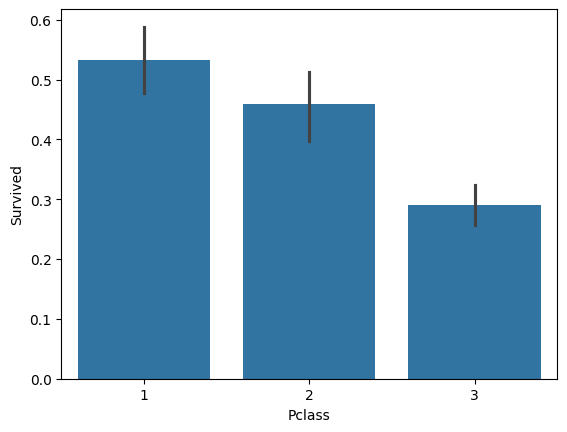

In [15]:
sns.barplot(x='Pclass',y='Survived',data=df)
plt.show()

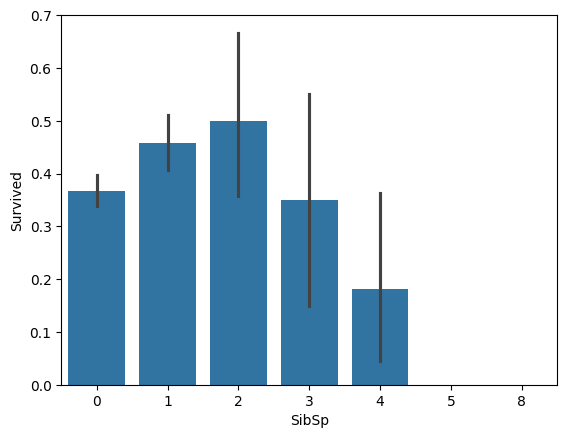

In [16]:
sns.barplot(x='SibSp',y='Survived',data=df)
plt.show()

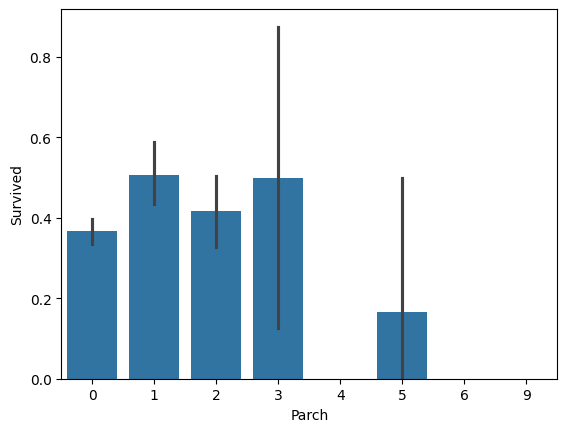

In [17]:
sns.barplot(x='Parch',y='Survived',data=df)
plt.show()

# Data Preprocessing

In [18]:
df=df.drop(['Name'],axis=1)
df=df.drop(['Ticket'],axis=1)
df=df.drop(['Cabin'],axis=1)
df=df.drop(['PassengerId'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
413,NaN,3,male,NaN,0,0,8.0500,S
414,NaN,1,female,39.0,0,0,108.9000,C
415,NaN,3,male,38.5,0,0,7.2500,S
416,NaN,3,male,NaN,0,0,8.0500,S


In [19]:
df=df.dropna(subset=['Embarked'])
df=df.dropna(subset=['Age'])
df=df.fillna(df['Survived'].mean())
df=df.dropna(subset=['Fare'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000000,3,male,22.0,1,0,7.2500,S
1,1.000000,1,female,38.0,1,0,71.2833,C
2,1.000000,3,female,26.0,0,0,7.9250,S
3,1.000000,1,female,35.0,1,0,53.1000,S
4,0.000000,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
409,0.404494,3,female,3.0,1,1,13.7750,S
411,0.404494,1,female,37.0,1,0,90.0000,Q
412,0.404494,3,female,28.0,0,0,7.7750,S
414,0.404494,1,female,39.0,0,0,108.9000,C


In [20]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [21]:
num_col=df.select_dtypes(include=np.number).columns
num_col

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [22]:
standard_scaler = StandardScaler()
df[num_col]= standard_scaler.fit_transform(df[num_col])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-0.997984,0.940486,male,-0.545236,0.543843,-0.501763,-0.526253,S
1,1.469254,-1.439798,female,0.567123,0.543843,-0.501763,0.623120,C
2,1.469254,0.940486,female,-0.267147,-0.552242,-0.501763,-0.514137,S
3,1.469254,-1.439798,female,0.358555,0.543843,-0.501763,0.296737,S
4,-0.997984,0.940486,male,0.358555,-0.552242,-0.501763,-0.511894,S
...,...,...,...,...,...,...,...,...
409,0.000000,0.940486,female,-1.866163,0.543843,0.688784,-0.409132,S
411,0.000000,-1.439798,female,0.497600,0.543843,-0.501763,0.959078,Q
412,0.000000,0.940486,female,-0.128102,-0.552242,-0.501763,-0.516830,S
414,0.000000,-1.439798,female,0.636645,-0.552242,-0.501763,1.298326,C


In [23]:
cat_col=df.select_dtypes(include='object').columns
cat_col

Index(['Sex', 'Embarked'], dtype='object')

In [24]:
label_encoders = {}
for cat_col in df:  # Iterate directly over the columns
    le = LabelEncoder()
    df[cat_col] = le.fit_transform(df[cat_col])  # Apply encoding to each column
    label_encoders[cat_col] = le  # Store the encoder

In [25]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,32,1,0,20,2
1,2,0,0,57,1,0,213,0
2,2,2,0,39,0,0,43,2
3,2,0,0,53,1,0,193,2
4,0,2,1,53,0,0,45,2
...,...,...,...,...,...,...,...,...
409,1,2,0,9,1,1,91,2
411,1,0,0,56,1,0,232,1
412,1,2,0,42,0,0,32,2
414,1,0,0,59,0,0,236,0


# Building Predictive Models

In [26]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [27]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [28]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,32,1,0,20,2
1,0,0,57,1,0,213,0
2,2,0,39,0,0,43,2
3,0,0,53,1,0,193,2
4,2,1,53,0,0,45,2
...,...,...,...,...,...,...,...
409,2,0,9,1,1,91,2
411,0,0,56,1,0,232,1
412,2,0,42,0,0,32,2
414,0,0,59,0,0,236,0


In [29]:
y

,Survived
0,0
1,2
2,2
3,2
4,0
...,...
409,1
411,1
412,1
414,1


# LightGBM

In [30]:
d_train = lgb.Dataset(x_train, label=y_train)

In [31]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [32]:
clf = lgb.train(params, d_train, 500)

[LightGBM] [Info] Number of positive: 445, number of negative: 285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 212
[LightGBM] [Info] Number of data points in the train set: 730, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.609589 -> initscore=0.445585
[LightGBM] [Info] Start training from score 0.445585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [33]:
y_pred_lgbm=clf.predict(x_test)
y_pred_lgbm

array([0.51461585, 0.393549  , 0.73648043, 0.56233001, 0.47686838,
       0.77938048, 0.40678157, 0.49299427, 0.65319103, 0.54687431,
       0.66871308, 0.81551891, 0.4170408 , 0.65452185, 0.34637254,
       0.53944784, 0.51091487, 0.48277075, 0.4650281 , 0.65529646,
       0.54865907, 0.62141207, 0.57258441, 0.55916978, 0.43813668,
       0.7419322 , 0.60574757, 0.59248305, 0.71093025, 0.78527411,
       0.67819088, 0.68398283, 0.5881188 , 0.4650281 , 0.73237457,
       0.39241389, 0.7874279 , 0.88327579, 0.6120724 , 0.87688582,
       0.6863393 , 0.44479144, 0.34637254, 0.4170408 , 0.67658556,
       0.58424775, 0.88029668, 0.67784292, 0.82248038, 0.51007361,
       0.69582533, 0.65265081, 0.85721437, 0.66429657, 0.44697054,
       0.6626319 , 0.42675945, 0.53743023, 0.86258998, 0.63320034,
       0.83901165, 0.80511135, 0.54326517, 0.54000149, 0.79359006,
       0.85803076, 0.51448939, 0.4834815 , 0.60744688, 0.81917849,
       0.39622726, 0.47081498, 0.8344104 , 0.77705664, 0.68687

In [34]:
predictions_lgbm = [round(value) for value in y_pred_lgbm]
predictions_lgbm

[1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,


In [35]:
accuracy_lgbm = accuracy_score(y_test, predictions_lgbm)
accuracy_lgbm

0.3980891719745223

In [36]:
precision_lgbm =precision_score(y_test,predictions_lgbm,average='macro')
precision_lgbm

0.3206069505628977

In [37]:
recall_score_lgbm =recall_score(y_test,predictions_lgbm,average='macro')
recall_score_lgbm

0.39877865149740677

In [38]:
f1_score_lgbm =f1_score(y_test,predictions_lgbm,average='macro')
f1_score_lgbm

0.31379645075254226

# XGBoost

In [39]:
# fit model no training data
model = XGBClassifier(max_depth =6, n_estimators=500, learning_rate=0.50,gamma=0.5, objective='binary:logistic')
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [40]:
# make predictions for test data
y_pred_xgbm = model.predict(x_test)
predictions_xgbm = [round(value) for value in y_pred_xgbm]
y_pred_xgbm

array([0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2, 2, 1, 2, 1, 0, 0, 0,
       1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 2,
       0, 0, 2, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2,
       1, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 0, 2, 0,
       0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0,
       1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2,
       1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0,

In [41]:
predictions_xgbm

[0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 2,


In [42]:
# evaluate predictions
accuracy_xgbm = accuracy_score(y_test, predictions_xgbm)
precision_score_xgbm =precision_score(y_test,predictions_xgbm,average='macro')
recall_score_xgbm =recall_score(y_test,predictions_xgbm,average='macro')
f1_score_xgbm =f1_score(y_test,predictions_xgbm,average='macro')
print("Accuracy_xgbm: %.2f" % (accuracy_xgbm))
print("precision_score_xgbm:%.2f" % precision_score_xgbm)
print("recall_score_xgbm:%.2f" % recall_score_xgbm)
print("f1_score_xgbm:%.2f" % f1_score_xgbm)

Accuracy_xgbm: 0.59
precision_score_xgbm:0.55
recall_score_xgbm:0.56
f1_score_xgbm:0.55


# Comparative Analysis


In [45]:
df_1=pd.DataFrame({'s.no':["lgbm","xgbm"],'Accuracy':[accuracy_lgbm,accuracy_xgbm],'Precision':[precision_lgbm,precision_score_xgbm],'Recall':[recall_score_lgbm,recall_score_xgbm],'F1_score':[f1_score_lgbm,f1_score_xgbm]})
df_1

,s.no,Accuracy,Precision,Recall,F1_score
0,lgbm,0.398089,0.320607,0.398779,0.313796
1,xgbm,0.585987,0.551320,0.557551,0.551801


# Improve Model Performance(Hyperparameter Tuning)

In [46]:
# Example for LightGBM
param_grid_lgbm = {
    'num_leaves': [31, 50],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [20, 40]
}
grid_lgbm = GridSearchCV(estimator=lgb.LGBMClassifier(), param_grid=param_grid_lgbm, cv=3, scoring='f1')
grid_lgbm.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 7
[LightGBM] [Info] Start training from score -0.939185
[LightGBM] [Info] Start training from score -1.086342
[LightGBM] [Info] Start training from score -1.303407
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.05, 0.1], 'n_estimators': [20, 40],
                         'num_leaves': [31, 50]},
             scoring='f1')

In [47]:
print("Best parameters for LightGBM:", grid_lgbm.best_params_)

Best parameters for LightGBM: {'learning_rate': 0.05, 'n_estimators': 20, 'num_leaves': 31}


In [48]:
# Example for XGBoost
param_grid_xgb = {
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100]
}
grid_xgb = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid_xgb, cv=3, scoring='f1')
grid_xgb.fit(x_train, y_train)
print("Best parameters for XGBoost:", grid_xgb.best_params_)


Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
